In [3]:
import cv2
import numpy as np

video = cv2.VideoCapture('sampel.mp4')

i = 0

ac_r_ma = []
ac_b_ma = []
dc_r_ma = []
dc_b_ma = []


while(video.isOpened()):
    ret, img = video.read()
    
    if ret == True:
        # Crop the image
        x = img.shape[0] // 2
        y = img.shape[1] // 2
        w, h = 500 // 2, 500 // 2
        img = img[x-h:x+h, y-h:y+h, :]
        
        # Display the image
        cv2.imshow('image', img)
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        i = i + 1
        
        # Get R and B band
        r = img[:, :, 0]
        b = img[:, :, 2]

        # Get DC (Mean)
        dc_r = r.mean()
        dc_b = b.mean()

        # Get AC (STD)
        ac_r = r.std()
        ac_b = b.std()
        
        ac_r_ma.append(ac_r)
        ac_b_ma.append(ac_b)
        dc_r_ma.append(dc_r)
        dc_b_ma.append(dc_b)
        
        if cv2.waitKey(25) == ord('q'):
            break
    else:
        break

ac_r_ma = np.array(ac_r_ma)
ac_b_ma = np.array(ac_b_ma)
dc_r_ma = np.array(dc_r_ma)
dc_b_ma = np.array(dc_b_ma)
    
video.release()
cv2.destroyAllWindows()

Before:  (1920, 864, 3)
After:  (50, 50, 3)


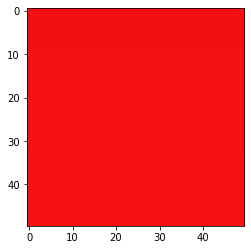

In [4]:
import matplotlib.pyplot as plt

video = cv2.VideoCapture('sampel.mp4')

ret, img = video.read()

print("Before: ", img.shape)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Crop
x = img.shape[0] // 2
y = img.shape[1] // 2
w, h = 50 // 2, 50 // 2
img = img[x-h:x+h, y-h:y+h, :]

print("After: ", img.shape)
plt.imshow(img)

In [5]:
ac_r_ma.mean(), dc_r_ma.mean(), ac_b_ma.mean(), dc_b_ma.mean()

(5.903622105157322, 243.01799997368423, 2.4938114535045286, 16.193631342105263)

In [6]:
spo2 = 100 - 5 * ( (ac_r_ma.mean() / dc_r_ma.mean()) / (ac_b_ma.mean() / dc_b_ma.mean()) )
print(spo2)

99.21126566818974


In [7]:
(ac_r_ma.mean() / dc_r_ma.mean()) / (ac_b_ma.mean() / dc_b_ma.mean())

0.15774686636205104